In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style and size defaults
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# 1. Load the dataset
df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/02_Data/preprocessed_data.csv")

In [4]:
# 2. Basic info about data
print("----- Data Info -----")
print(df.info())
print("\n----- Statistical Summary (Numerical) -----")
print(df.describe())

----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     70

In [5]:
print("\n----- Sample Data -----")
print(df.head())


----- Sample Data -----
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0       

In [6]:
# 3. Check missing values
print("\n----- Missing Values -----")
print(df.isnull().sum())


----- Missing Values -----
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# For TotalCharges, convert to numeric and coerce errors (if any)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# After conversion, check again for missing values
print("\n----- Missing Values After TotalCharges Conversion -----")
print(df.isnull().sum())


----- Missing Values After TotalCharges Conversion -----
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
# Drop rows with missing TotalCharges (if any)
df = df.dropna(subset=['TotalCharges'])

### 4. Visualizations

In [48]:
def labeled_countplot(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=9)

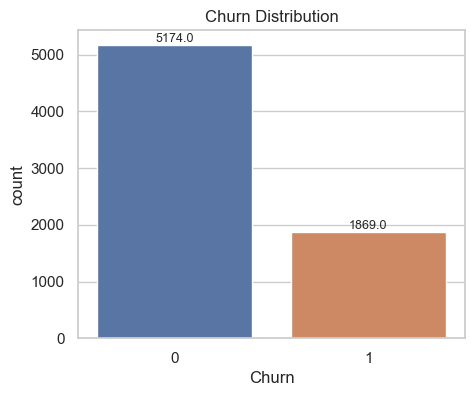

In [49]:
# 1. Churn Distribution
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Churn', data=df)
labeled_countplot(ax)
plt.title("Churn Distribution")
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/01_churn_distribution.png")
plt.show()

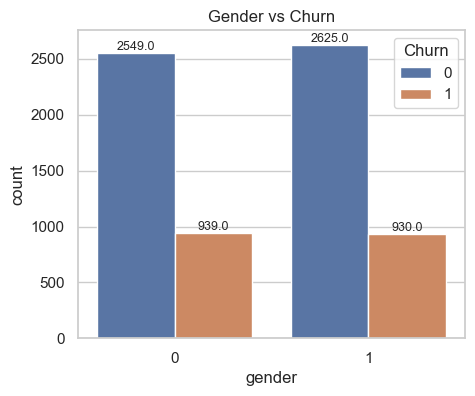

In [50]:
# 2. Gender vs Churn (Countplot with label)
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='gender', hue='Churn', data=df)
labeled_countplot(ax)
plt.title("Gender vs Churn")
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/02_gender_vs_churn.png")

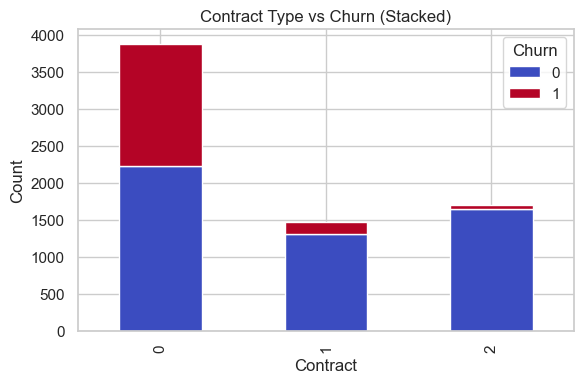

In [51]:

# 3. Contract Type vs Churn (Stacked Bar Plot)
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='coolwarm')
plt.title("Contract Type vs Churn (Stacked)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/03_contact_type_churn.png")

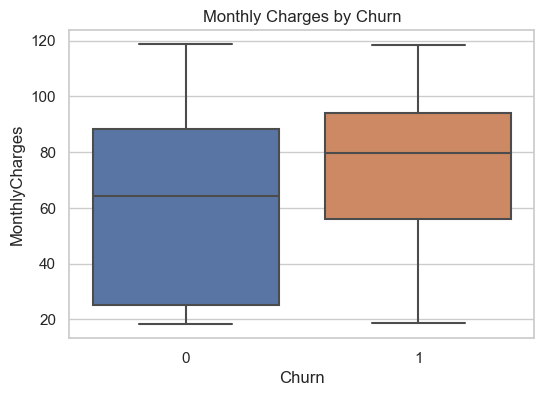

In [52]:
# 4. Boxplot: Monthly Charges by Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/04_monthly_charge_by_churn.png")

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


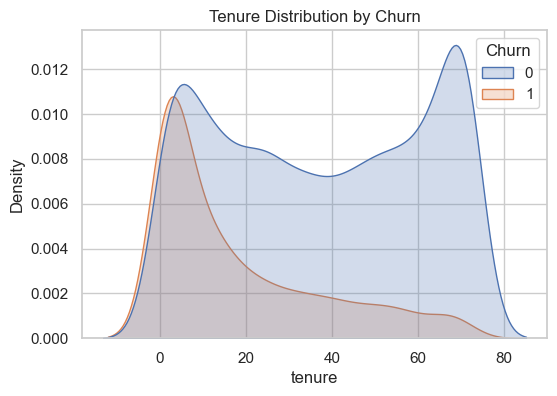

In [53]:
# 5. KDE Plot: Tenure by Churn
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)
plt.title("Tenure Distribution by Churn")
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/05_Tenure_Distribution.png")

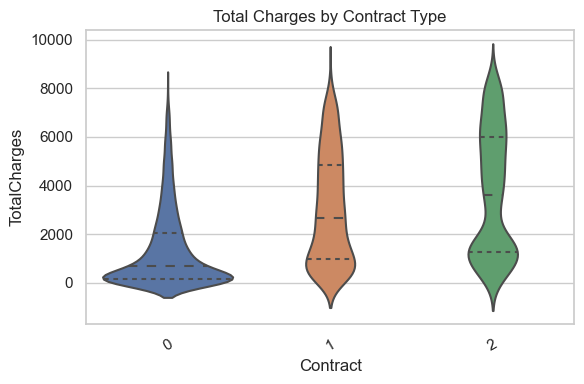

In [54]:
# 6. Violin Plot: TotalCharges by Contract
plt.figure(figsize=(6, 4))
sns.violinplot(x='Contract', y='TotalCharges', data=df, inner="quartile")
plt.title("Total Charges by Contract Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/06_Total_charge_by_Contract.png")

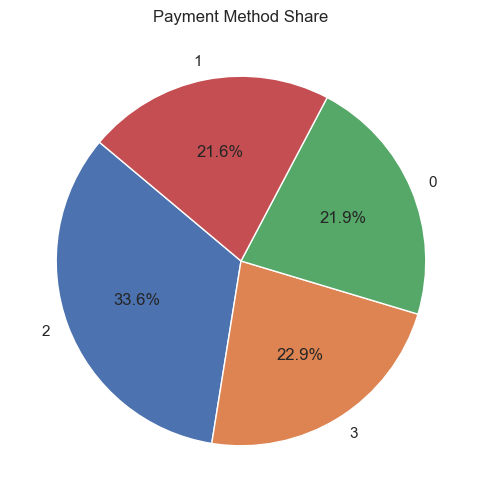

In [55]:
# 7. Pie Chart: Payment Method Distribution
payment_counts = df['PaymentMethod'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Method Share")
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/07_Payment_method.png")

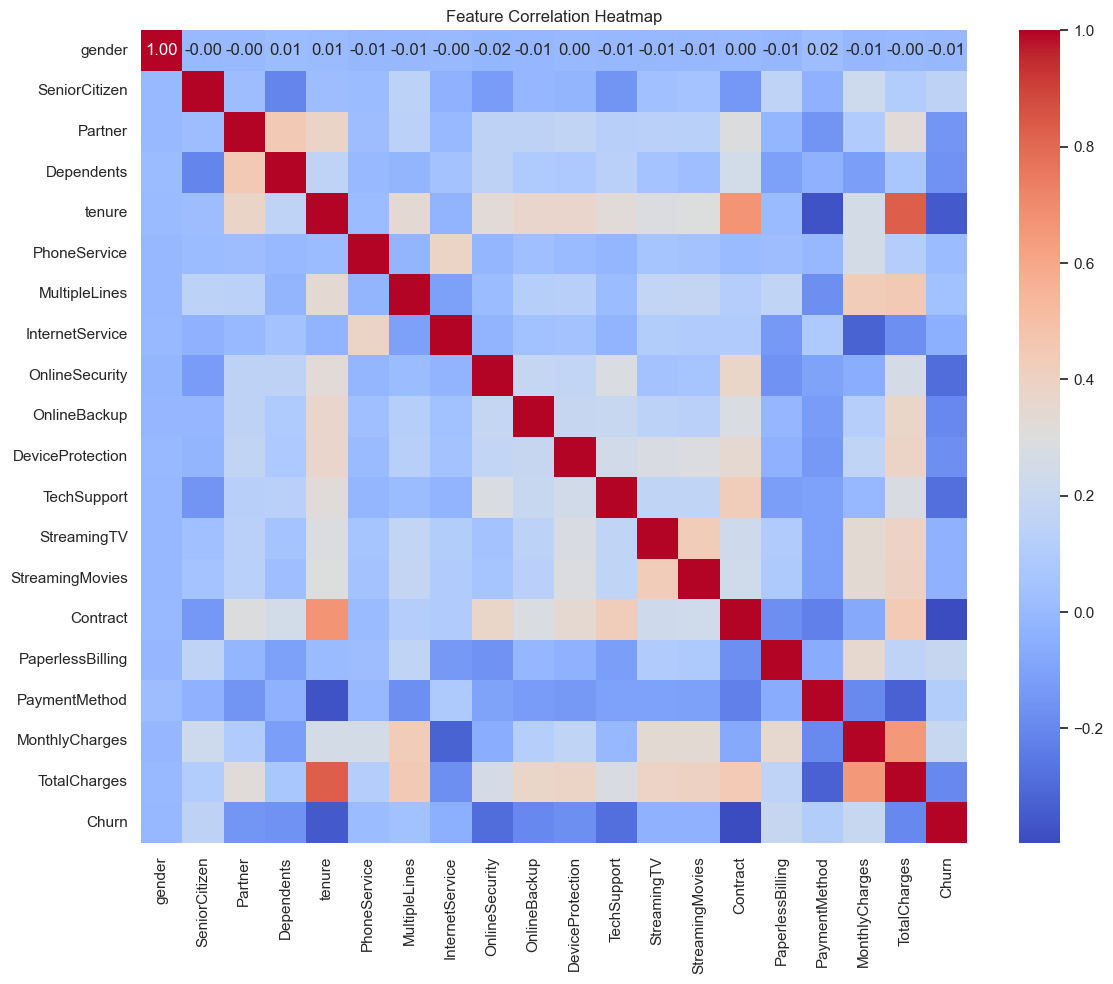

In [56]:
# 8. Heatmap of Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/08_feature_correlation_heatmap.png")

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


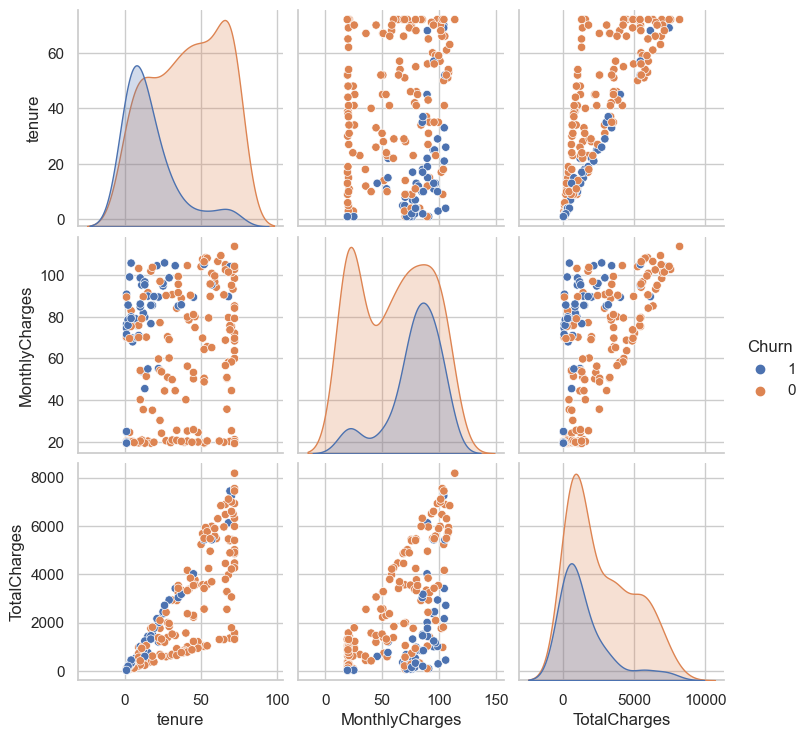

In [57]:
# 9. Pairplot of numeric features
sample_df = df.sample(200, random_state=42)
sns.pairplot(sample_df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')
plt.savefig("R:/Projects/1_Data_Science & ML_Projects/02_Customer Churn Prediction in Telecom Industry/07_EDA_Outputs/09_Pairplot.png")